# Week 1
## Diabetes Regression
당뇨병 데이터를 통해 BMI 지수 예측 모델을 만들어 보자.

- Regression -> BMI 예측
    - 머신러닝
    - 딥러닝(dense layer)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
'''
    Pregnancies: 임신 횟수
    Glucose: 포도당 수치
    BloodPressure: 혈압
    SkinThickness: 피부 두께
    Insulin: 인슐린 수치
    BMI: 체질량지수 (BMI)
    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수
    Age: 나이
    Outcome: 결과 (당뇨병 여부)
'''

'\n    Pregnancies: 임신 횟수\n    Glucose: 포도당 수치\n    BloodPressure: 혈압\n    SkinThickness: 피부 두께\n    Insulin: 인슐린 수치\n    BMI: 체질량지수 (BMI)\n    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수\n    Age: 나이\n    Outcome: 결과 (당뇨병 여부)\n'

In [5]:
X = df.drop(['BMI', 'Outcome'], axis=1)
y = df['BMI']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB


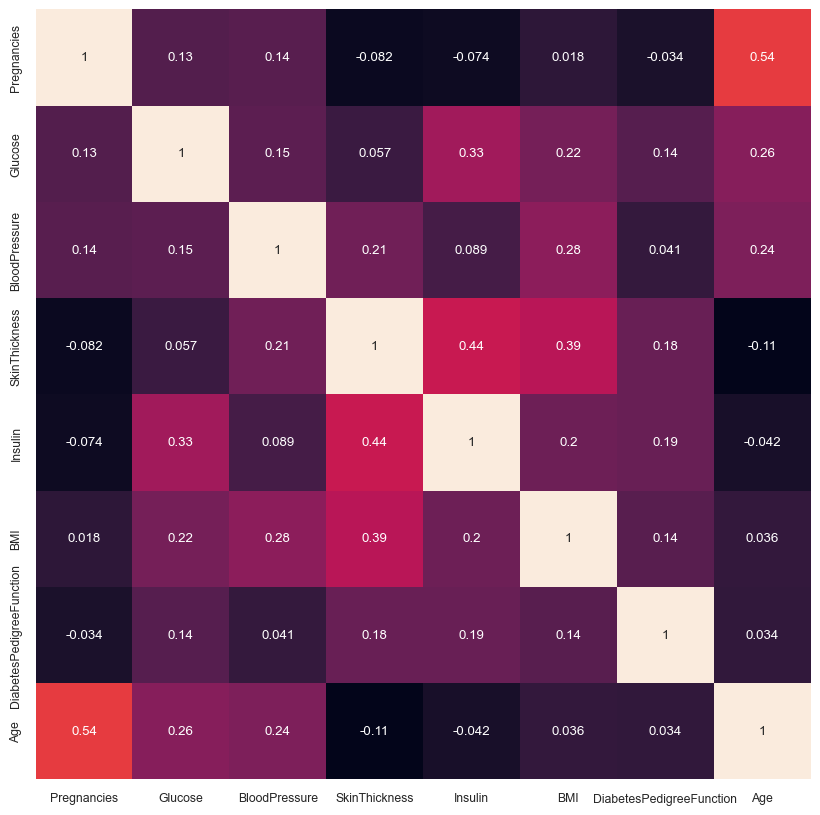

In [7]:
# 상관계수
df = df.drop(['Outcome'], axis=1)
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

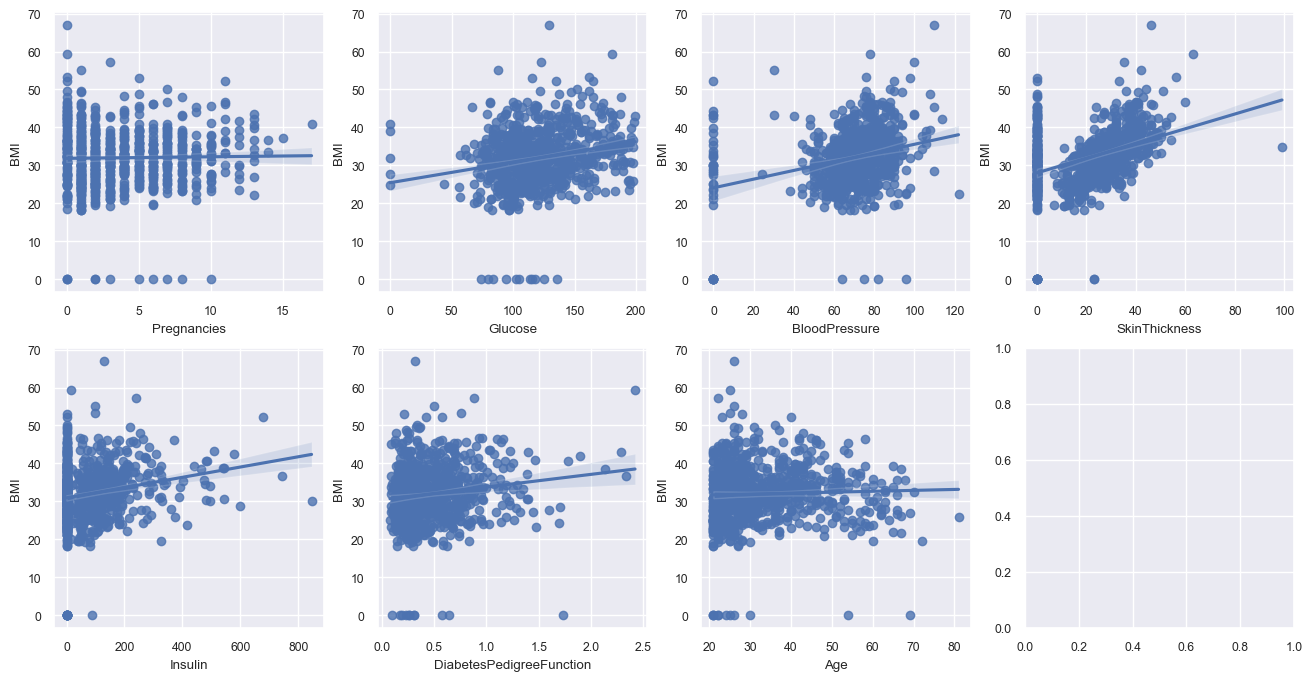

In [8]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
for i, feature in enumerate(X.columns):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='BMI', data=df, ax = axs[row][col])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## ML
- 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(y_test, y_preds))
print('r2 score', r2_score(y_test, y_preds))

평균제곱근오차 49.41151592580262
r2 score 0.16752164917717072


In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(y_test, y_preds))
print('r2 score', r2_score(y_test, y_preds))

평균제곱근오차 48.48365535064938
r2 score 0.18315411515042646


In [14]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(y_test, y_preds))
print('r2 score', r2_score(y_test, y_preds))

평균제곱근오차 47.99870269711459
r2 score 0.19132453003605798


## DL
- DNN
- CNN

In [60]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(7,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

In [62]:
model.compile(loss='mse', metrics=['mse'])

In [64]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history=model.fit(x=X_train, y=y_train, epochs=30,validation_data= (X_test,y_test), verbose=0)
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


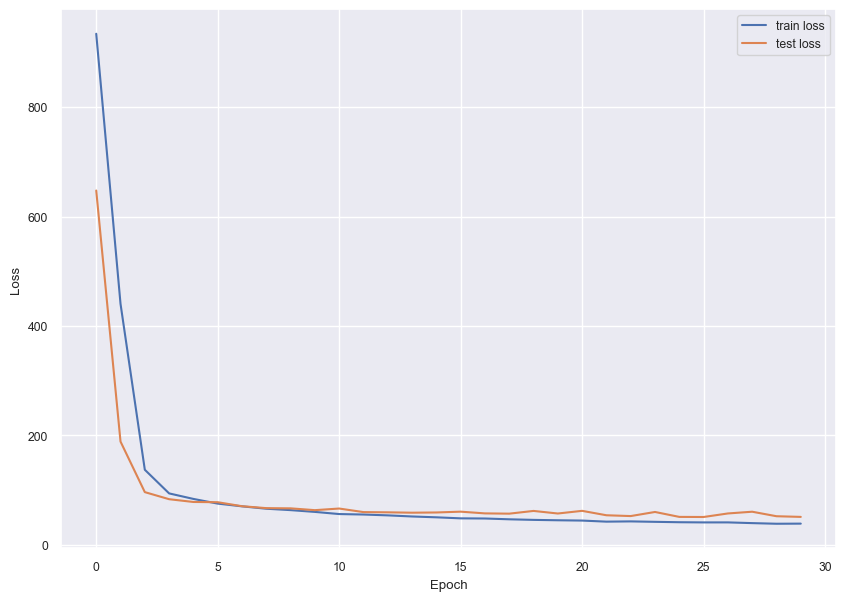

In [67]:
# loss 체크
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()